## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset and Data Preprocessing

In [2]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [6]:
data.duplicated().any()

False

In [7]:
#data.to_csv("LendingData.csv", index=False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335868 non-null  float64
 1   term                  335868 non-null  object 
 2   int_rate              335868 non-null  float64
 3   installment           335868 non-null  float64
 4   grade                 335868 non-null  object 
 5   sub_grade             335868 non-null  object 
 6   emp_title             335868 non-null  object 
 7   emp_length            335868 non-null  object 
 8   home_ownership        335868 non-null  object 
 9   annual_inc            335868 non-null  float64
 10  verification_status   335868 non-null  object 
 11  issue_d               335868 non-null  object 
 12  loan_status           335868 non-null  object 
 13  purpose               335868 non-null  object 
 14  title                 335868 non-null  object 
 15  

In [9]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,335868.000000,335868.000000,335868.000000,3.358680e+05,335868.000000,335868.000000,335868.000000,3.358680e+05,335868.000000,335868.000000,335868.000000,335868.000000
mean,14522.747627,13.795634,445.158837,7.581716e+04,17.719144,11.598324,0.184921,1.619306e+04,54.365450,25.858912,1.802699,0.125463
std,8386.593240,4.505201,251.588273,6.197219e+04,8.147837,5.181585,0.543618,2.099069e+04,23.962637,11.901536,2.139647,0.362258
min,1000.000000,5.320000,28.750000,5.000000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.640000,263.780000,4.700000e+04,11.630000,8.000000,0.000000,6.302000e+03,36.900000,17.000000,0.000000,0.000000
50%,12400.000000,13.350000,388.200000,6.500000e+04,17.250000,11.000000,0.000000,1.148000e+04,55.300000,24.000000,1.000000,0.000000
75%,20000.000000,16.780000,583.790000,9.000000e+04,23.420000,14.000000,0.000000,1.999025e+04,73.000000,33.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Feature Engineering

In [10]:
df = data.drop(columns=["issue_d", "title", "address", "emp_title", "earliest_cr_line", "sub_grade"])

In [11]:
df["term"] = df["term"].replace({"36 months":"a", "60 months":"b"})

In [12]:
df["emp_length"] = df["emp_length"].replace("< 1 year", "a")
df["emp_length"] = df["emp_length"].replace(["1 year", "2 years", "3 years", "4 years", "5 years"], ["b","b","b","b","b"])
df["emp_length"] = df["emp_length"].replace(["6 years", "7 years", "8 years", "9 years"], ["c","c","c","c"])
df["emp_length"] = df["emp_length"].replace("10+ years", "d")

In [13]:
df["home_ownership"] = df["home_ownership"].replace(["ANY", "NONE"], ["OTHER","OTHER"])

In [14]:
df["verification_status"] = df["verification_status"].replace("Source Verified", "Verified")

In [15]:
df["purpose"] = df["purpose"].replace(["wedding", "renewable_energy", "educational"], ["other", "other", "other"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335868 non-null  float64
 1   term                  335868 non-null  object 
 2   int_rate              335868 non-null  float64
 3   installment           335868 non-null  float64
 4   grade                 335868 non-null  object 
 5   emp_length            335868 non-null  object 
 6   home_ownership        335868 non-null  object 
 7   annual_inc            335868 non-null  float64
 8   verification_status   335868 non-null  object 
 9   loan_status           335868 non-null  object 
 10  purpose               335868 non-null  object 
 11  dti                   335868 non-null  float64
 12  open_acc              335868 non-null  float64
 13  pub_rec               335868 non-null  float64
 14  revol_bal             335868 non-null  float64
 15  

In [17]:
cat_col = df.select_dtypes(include=["object", "category"]).columns.tolist()
num_col = df.select_dtypes(include=["int", "float"]).columns.tolist()
print(num_col)
print(cat_col)

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']


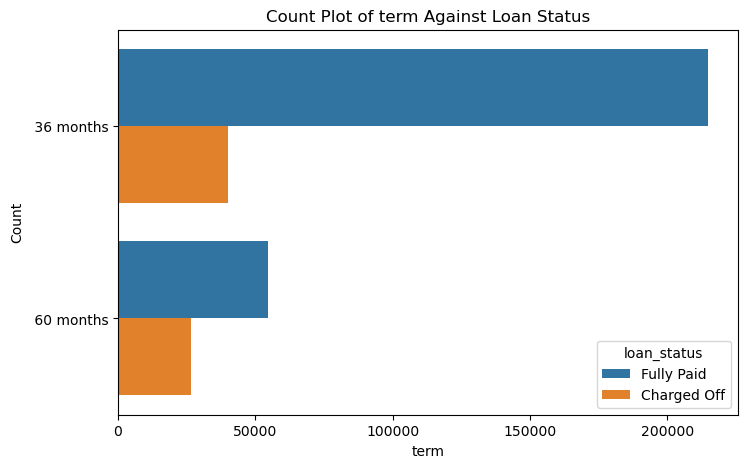

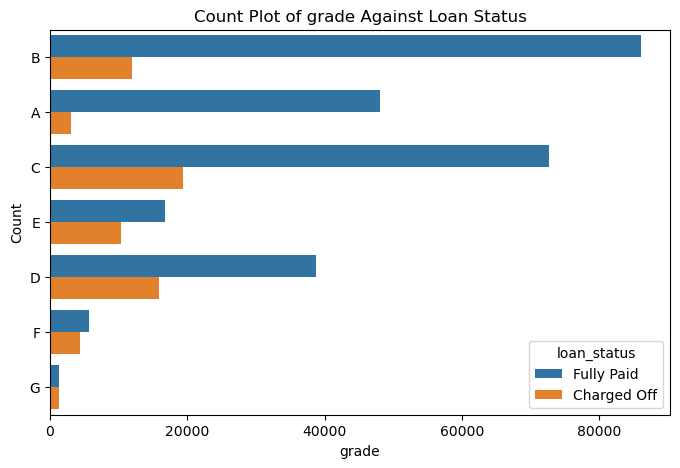

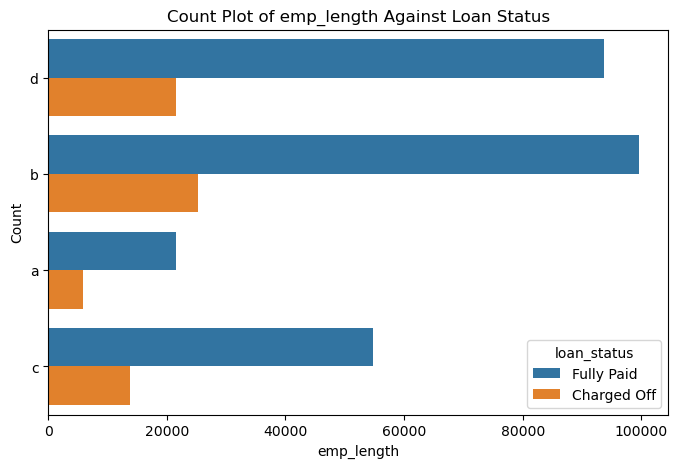

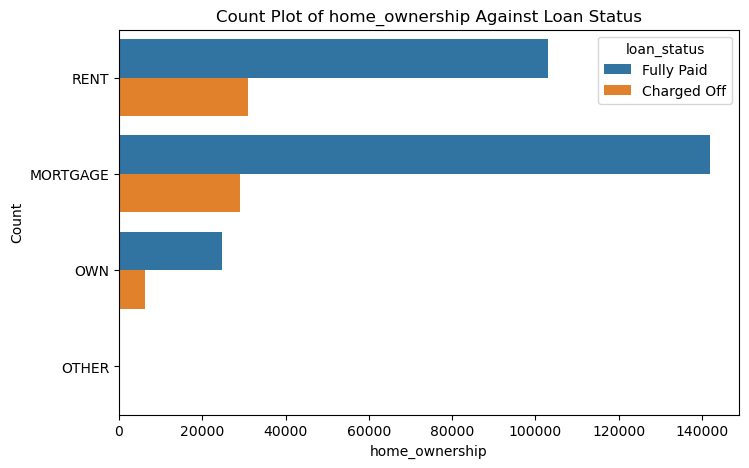

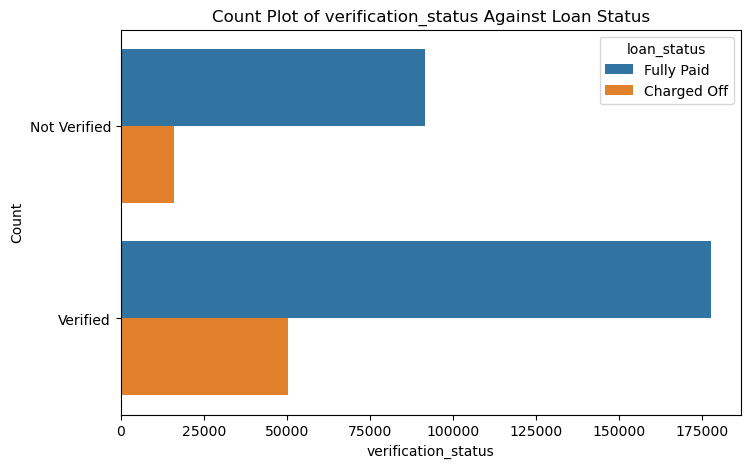

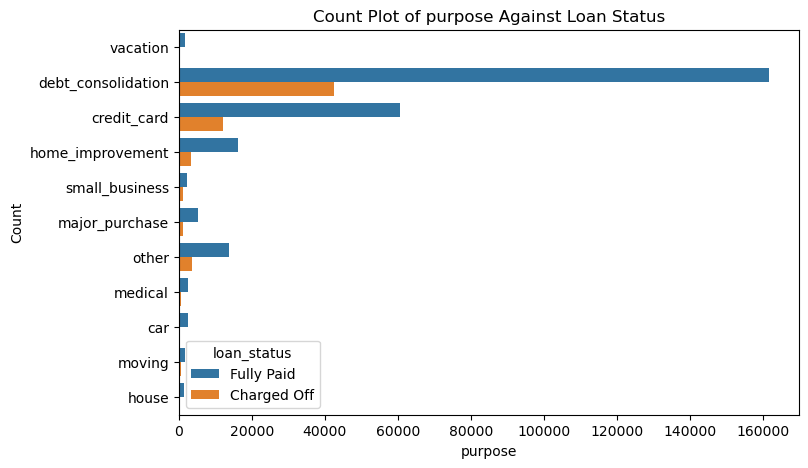

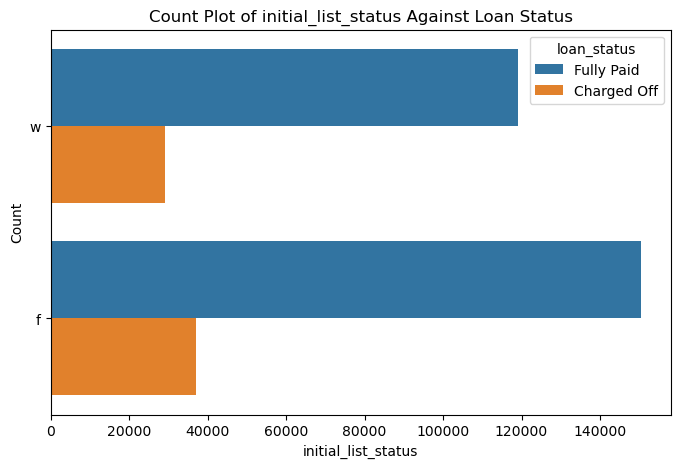

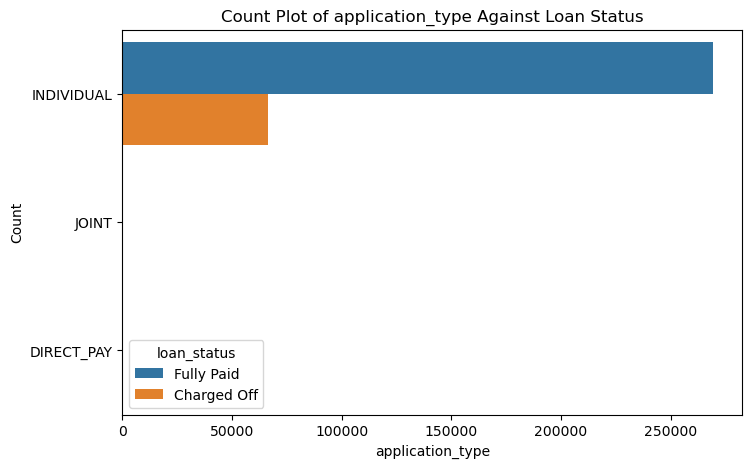

In [18]:
for col in cat_col:
    if col != "loan_status":
        plt.figure(figsize=(8,5))
        sns.countplot(data=df, y=col, hue="loan_status")
        plt.title(f'Count Plot of {col} Against Loan Status')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [19]:
df["loan_stat"] = df["loan_status"].map({"Fully Paid": 1, "Charged Off":0})

In [20]:
for col in num_col:
    df[col] = df[col].astype("int")

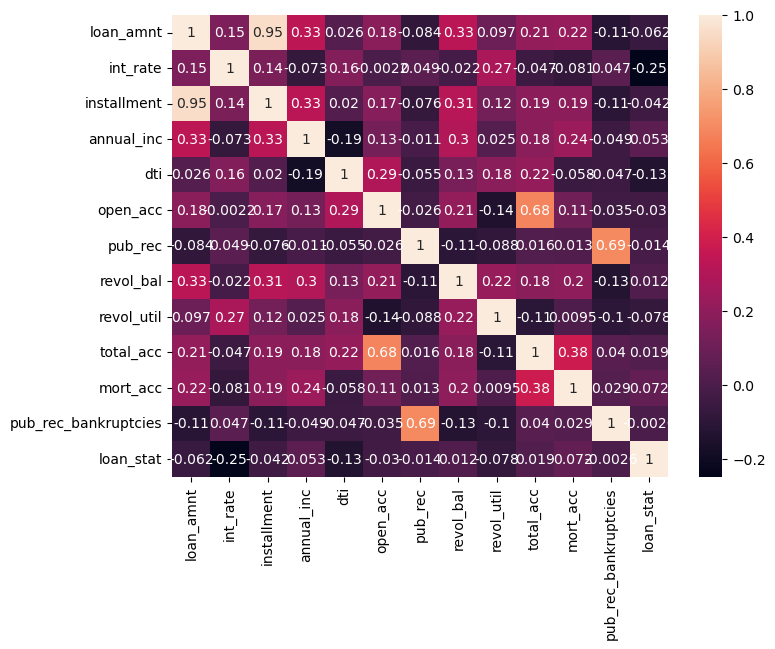

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
#SELECTING THE REQUIRED COLUMNS FOR PREDICTIONS
data = df[["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "initial_list_status", "dti","loan_amnt", "annual_inc", "open_acc", "mort_acc", "loan_stat"]]

In [23]:
data.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,dti,loan_amnt,annual_inc,open_acc,mort_acc,loan_stat
0,36 months,B,d,RENT,Not Verified,vacation,w,26,10000,117000,16,0,1
1,36 months,B,b,MORTGAGE,Not Verified,debt_consolidation,f,22,8000,65000,17,3,1
2,36 months,B,a,RENT,Verified,credit_card,f,12,15600,43057,13,0,1
3,36 months,A,c,RENT,Not Verified,credit_card,f,2,7200,54000,6,0,1
4,60 months,C,c,MORTGAGE,Verified,credit_card,f,33,24375,55000,13,1,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [25]:
#feature and target variables
X = data.drop(columns=["loan_stat"])
y = data["loan_stat"]

In [26]:
#splt data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#numerical and categorical features
numerical = ["dti", "loan_amnt", "annual_inc", "open_acc", "mort_acc"]
categorical = ["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "initial_list_status"]

In [28]:
#preprocessing 
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

In [29]:
#combinig the preprocessors into a Column Transformer
preprocessor = ColumnTransformer(
                    transformers = [
                        ("num", num_transformer, numerical),
                        ("cat", cat_transformer, categorical)
                    ]
)

In [30]:
rf_model = RandomForestClassifier(random_state=42)
xbg_model = XGBClassifier(random_state=42)
log_regmodel = LogisticRegression()

In [31]:
#creating a voting classifier that combines the models
voting = VotingClassifier(estimators=[
        ("rf", rf_model),
        ("xgb", xbg_model),
        ("log_reg", log_regmodel)
], voting="hard") #hard for majority voting

In [32]:
#creating a pipeline
pipeline = Pipeline(steps=[
                ("preprocessor", preprocessor),
                ("classifier", voting)
])

In [33]:
#training and evaluating the pipeline
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.07      0.13     13291
           1       0.81      0.99      0.89     53883

    accuracy                           0.80     67174
   macro avg       0.68      0.53      0.51     67174
weighted avg       0.76      0.80      0.74     67174

